#  Cyberbullying in social media and it's contribution to increased suicide rates among youths📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below --> 
The problem that I intend to address with this research and analysis is the increase in cyberbullying that has proven to be detrimental, especially to the younger demographic. Due to the serious psychological and emotional effects it can have on victims, which can include despair, anxiety, and in severe cases, suicide,this issue is important. It is imperative to combat cyberbullying in order to create a supportive and safe digital environment as technology develops and more people, particularly teenagers, become active online.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

-What is the relationship between recorded suicide cases and cyberbullying

-Is there a trend by age on the observed sources and targets of cyberbullying online 

-How can the social media platforms limit or get rid of extreme cyberbullying online 

-Are there any correlations between the countries with most social media users and the number of suicides reported

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

-There is a positive correlation between the increase in suicide rates, and cyberbullying activities online This implies that cyberbullying has has had a significant impact on the rate of suicide over the last 10 years.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

The Data sources I have identified for this project include:

-Kaggle datasets from suicide-watch for suicide trend from 1985-2016
-Kaggle datasets for compiled cyberbullying tweets with word scraping
-Webscrapped suicide demographic and behavioral data from cdc website 


## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->
I will use the data from Kaggle to identify the target demographic for the cyberbullying tweets, I then will analyse that data against the suicide data from both Kaggle and cdc to determine the average age group where suicide is more imminent and using the age and gender demographics to find a correlation by linear Regression and visualizations.

In [129]:
#importing libraries
import pandas as pd
import opendatasets as od
import numpy as np
import requests
from bs4 import BeautifulSoup
import os
import joblib
# Python ≥3.10 is required
import sys
assert sys.version_info >= (3, 10)
import statsmodels.api as sm


# Scikit Learn imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

# to make this notebook's output stable across runs
np.random.seed(42)



In [47]:
from wordcloud import WordCloud 

In [ ]:
# Data sources

tweets_url= "https://www.kaggle.com/datasets/soorajtomar/cyberbullying-tweets"

od.download (tweets_url, data_dir= "\data")

In [20]:
tweets_df = pd.read_csv ('./data/cyber/cyberbullying_tweets.csv')

tweets_df.head()

,Text,CB_Label
0,damn there is someones nana up here at beach w...,0
1,no kidding! dick clark was a corpse mechanical...,0
2,i read an article on jobros and thought damn w...,0
3,I got one fucking day of sprinkles and now it'...,0
4,I was already listening to Elliott smith and ...,0


In [3]:
#Data Source 2
suicide_url= "https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch"

od.download (suicide_url, data_dir= "./data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading suicide-watch.zip to ./data\suicide-watch


100%|██████████| 60.6M/60.6M [00:13<00:00, 4.82MB/s]


In [49]:
suicide_df = pd.read_csv ('data/suicide.csv')

suicide_df.head(10)




,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [39]:
suicide_df.describe ()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [8]:
#Exploring the records that have null values ready for cleaning
suicide_df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

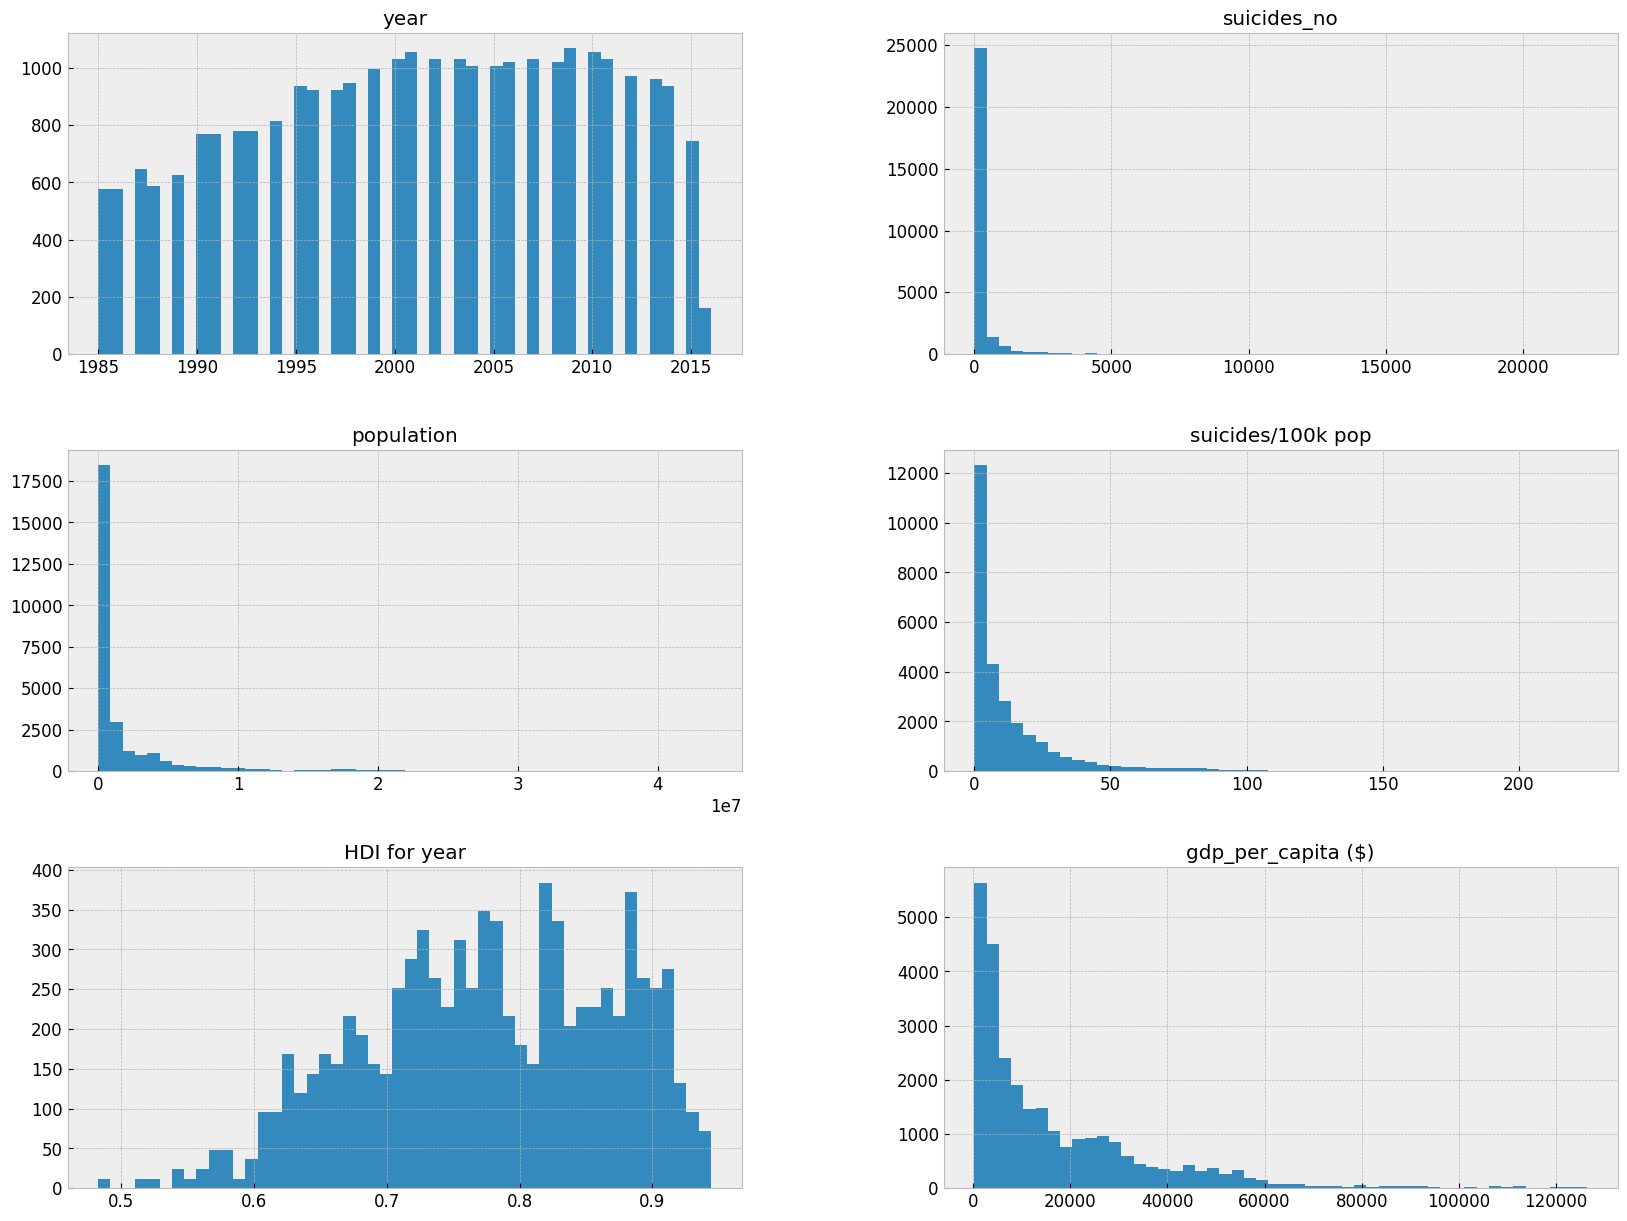

In [9]:
suicide_df.hist (bins=50, figsize= (20, 15) )
plt.show

In [97]:
print(suicide_df.columns.tolist())

['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']


In [10]:
cdc_url= "https://www.cdc.gov/mmwr/volumes/69/su/su6901a6.htm"
page= requests.get(cdc_url)
soup= BeautifulSoup (page.content, 'html.parser')
tables = soup.find_all('table')

cdc_data_df = pd.read_html (str(tables))

cdc_data_df

C:\Users\zsams\AppData\Local\Temp\ipykernel_5912\3141362488.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  cdc_data_df = pd.read_html (str(tables))


[                                             Behavior  \
 0             Seriously considered attempting suicide   
 1                                                 Yes   
 2                                                  No   
 3                                 Made a suicide plan   
 4                                                 Yes   
 5                                                  No   
 6                                   Attempted suicide   
 7                                                 Yes   
 8                                                  No   
 9   Made a suicide attempt requiring medical treat...   
 10                                                Yes   
 11                                                 No   
 
                                     Female % (95% CI)  \
 0             Seriously considered attempting suicide   
 1                                    24.1 (22.3‒26.0)   
 2                                    75.9 (74.0‒77.7)   
 3          

## Exploratory data analysis

At this stage, the data I have can show me the recorded suicide number by country. The data can be further explored by creating demographic statistics and try to explore if the suicide rate is prevalent to a certain demographic. 

Most of the HDI data appears to be missing and and since it is least significant to my topic, I will cleanup the data by removing the column from the dataframe.

I am unable to string the suicide dataset to the other datasets as the dataset does not specify the reason for the suicide and all that can be made at this point are assumptions

In [21]:
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [79]:
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

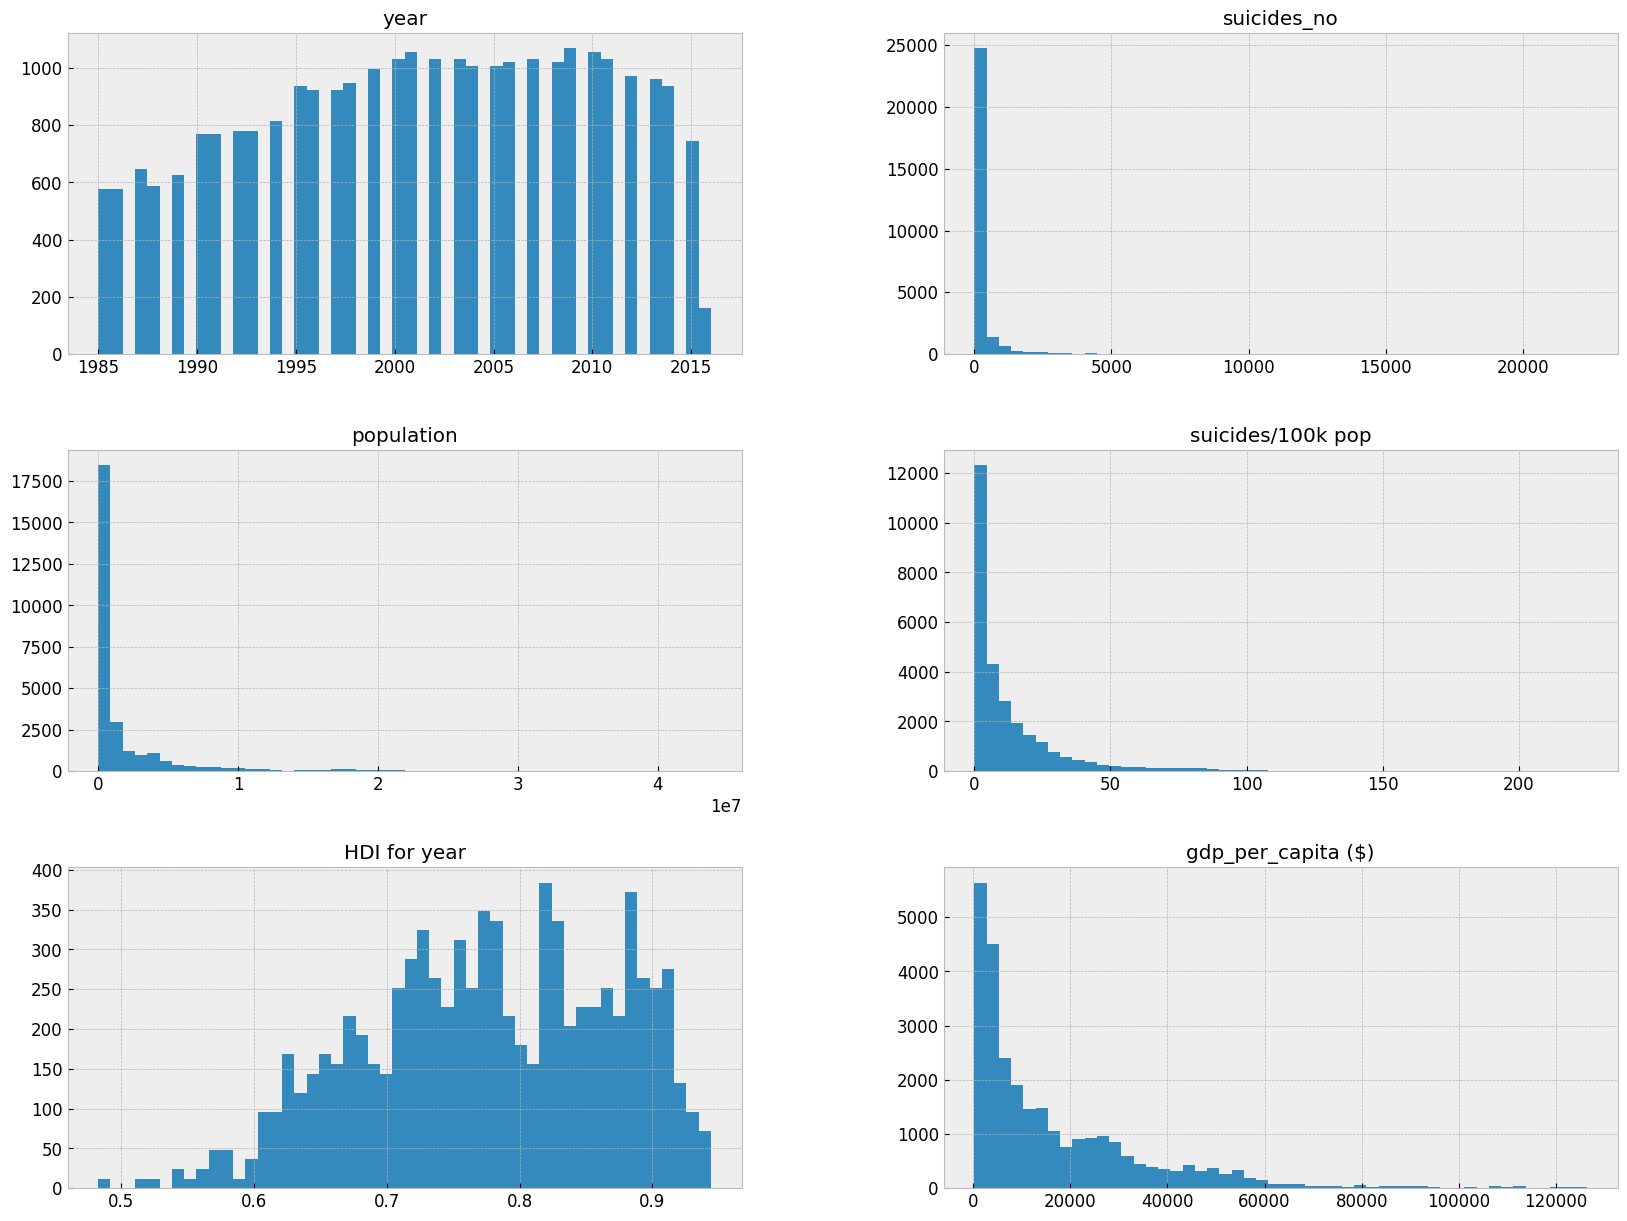

In [25]:
#Viewing a histogram to better understand the data
suicide_df.hist (bins=50, figsize= (20, 15) )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

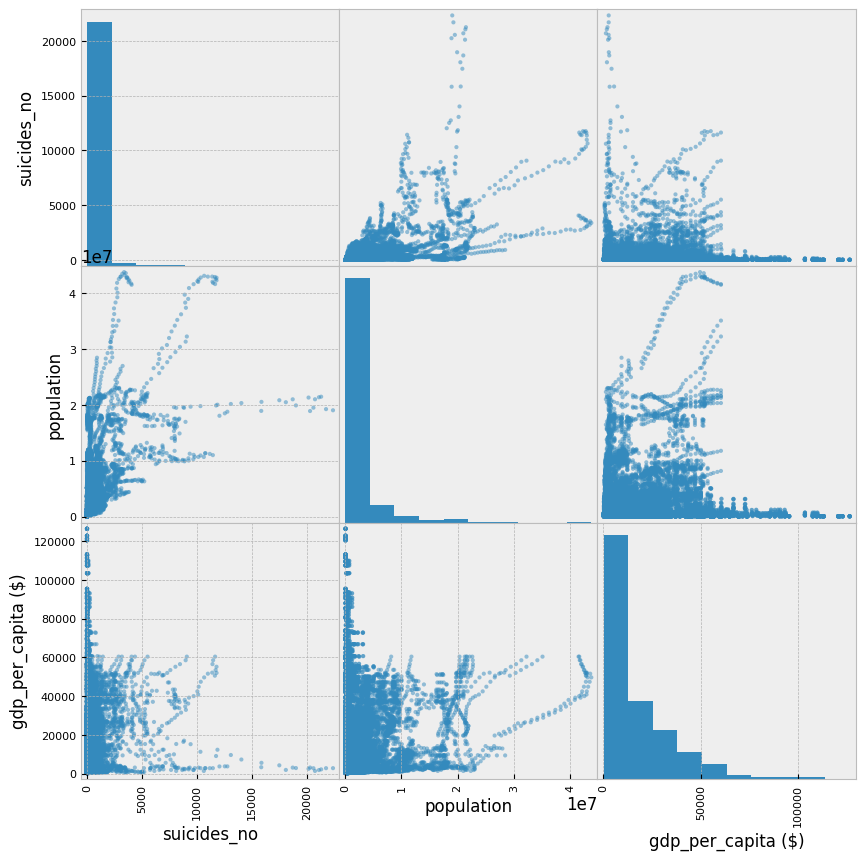

In [91]:
#Plotting the scatter plot to see how the different variables withing the data relate to each other
scatter_matrix (suicide_df[['suicides_no', 'population', 'gdp_per_capita ($)'  ]], figsize=(10, 10))
plt.show

<Axes: xlabel='age', ylabel='suicides_no'>

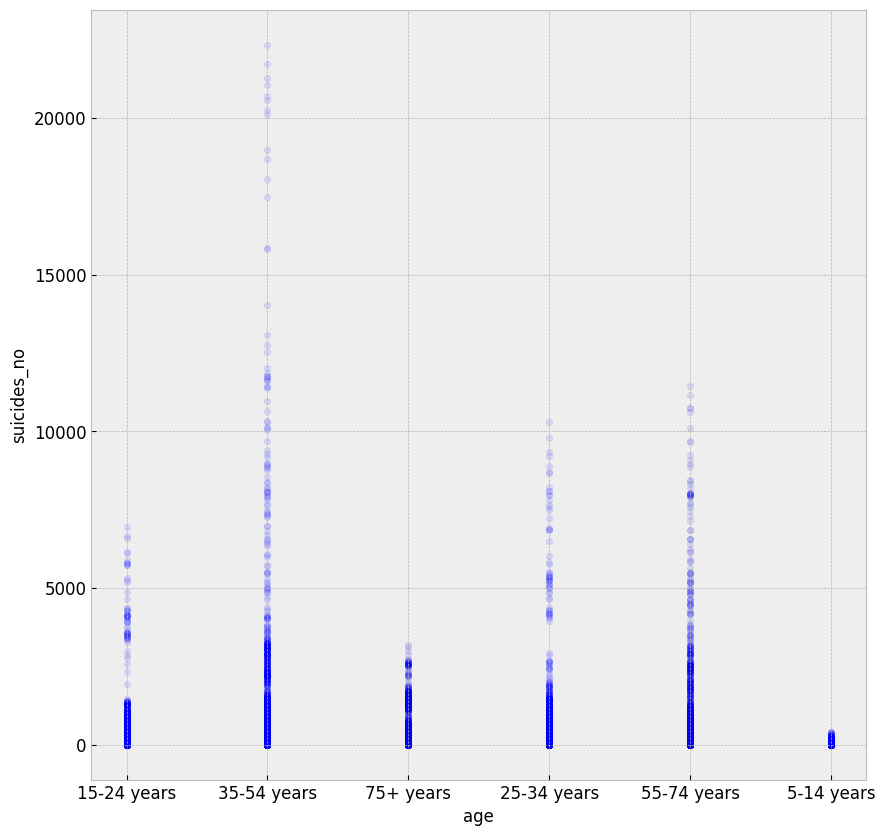

In [87]:
#Plotting a graph showing how the age groups relate to the number of reported suicide cases
suicide_df.plot(kind='scatter', x='age', y='suicides_no', alpha=0.1, figsize=(10, 10))

In [37]:
#exploring if there exists a correlation between the different columns
suicide_df.year.corr (suicide_df.suicides_no)

-0.004545957507435394

In [55]:
#Sorting the dataframe biggest suicide number from the data set
suicide_df.sort_values (by= "suicides_no", ascending=False).head (10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
20996,Russian Federation,1994,male,35-54 years,22338,19044200,117.30,Russian Federation1994,NaN,"395,077,301,248",2853,Boomers
21008,Russian Federation,1995,male,35-54 years,21706,19249600,112.76,Russian Federation1995,NaN,"395,531,066,563",2844,Boomers
21080,Russian Federation,2001,male,35-54 years,21262,21476420,99.00,Russian Federation2001,NaN,"306,602,673,980",2229,Boomers
21068,Russian Federation,2000,male,35-54 years,21063,21378098,98.53,Russian Federation2000,NaN,"259,708,496,267",1879,Boomers
21057,Russian Federation,1999,male,35-54 years,20705,21016400,98.52,Russian Federation1999,NaN,"195,905,767,669",1412,Boomers
21020,Russian Federation,1996,male,35-54 years,20562,19507100,105.41,Russian Federation1996,NaN,"391,719,993,757",2813,Boomers
20984,Russian Federation,1993,male,35-54 years,20256,18908000,107.13,Russian Federation1993,NaN,"435,083,713,851",3160,Boomers
21092,Russian Federation,2002,male,35-54 years,20119,21320535,94.36,Russian Federation2002,NaN,"345,110,438,692",2527,Boomers
21033,Russian Federation,1997,male,35-54 years,18973,19913400,95.28,Russian Federation1997,NaN,"404,926,534,140",2907,Boomers
21105,Russian Federation,2003,male,35-54 years,18681,21007346,88.93,Russian Federation2003,NaN,"430,347,770,732",3141,Boomers


In [57]:
# Group the data by country and sum the suicides number
suicides_by_country = suicide_df.groupby('country')['suicides_no'].sum().reset_index()

# Sort the data by suicides number in descending order
suicides_by_country = suicides_by_country.sort_values('suicides_no', ascending=False)
suicides_by_country

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950
...,...,...
55,Maldives,20
1,Antigua and Barbuda,11
79,San Marino,4
76,Saint Kitts and Nevis,0


In [63]:
pip install plotly

^C
Note: you may need to restart the kernel to use updated packages.


In [64]:
import plotly.express as px

In [81]:

# Create the map showing the distibution of the suicide reports across the world
fig = px.choropleth(suicides_by_country, locations='country', locationmode='country names', color='suicides_no', title='Countries with the Most Suicides Number')
fig.show()

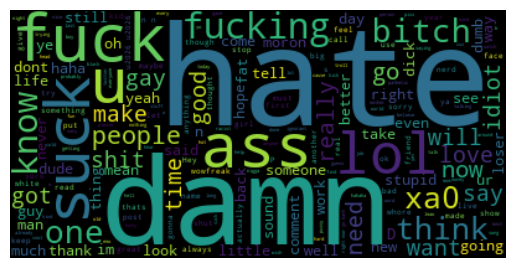

In [52]:
#Generating a wordcloud from the Cyberbullying tweets.
# Concatenate the text from all rows into a single string
text = ' '.join(tweets_df['Text'])

# Generate the word cloud
wordcloud = WordCloud().generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Machine Learning Implementation Process

In [92]:
#Dropping all the missing values from the dataframe
suicide_without_na = suicide_df.dropna () #removing empty data from the data frame


In [29]:
suicide_without_na.isnull().sum() #Print the new data frame with dropped null values

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [114]:
#Splitting the data set

train_set, test_set = train_test_split (suicide_df, test_size=0.2, random_state=45)
train_set.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
16655,Mexico,1992,female,75+ years,8,730100,1.10,Mexico1992,NaN,"363,609,163,462",4830,G.I. Generation
23525,South Africa,2015,female,55-74 years,10,3155486,0.32,South Africa2015,NaN,"317,741,039,198",6403,Boomers
235,Albania,2008,male,75+ years,2,44574,4.49,Albania2008,NaN,"12,881,352,688",4672,Silent
17686,New Zealand,2004,male,5-14 years,4,312260,1.28,New Zealand2004,NaN,"103,904,537,815",27325,Millenials
139,Albania,2000,female,25-34 years,3,245800,1.22,Albania2000,0.656,"3,632,043,908",1299,Generation X
22901,Slovakia,2002,female,15-24 years,9,443566,2.03,Slovakia2002,NaN,"35,083,608,131",6869,Millenials
8977,Finland,2006,female,5-14 years,1,302489,0.33,Finland2006,NaN,"216,552,502,823",43487,Millenials
24880,Switzerland,2007,male,5-14 years,3,417683,0.72,Switzerland2007,NaN,"479,913,034,322",66807,Generation Z
24739,Switzerland,1996,male,55-74 years,255,599400,42.54,Switzerland1996,NaN,"330,091,688,350",49621,Silent
19239,Poland,2006,male,25-34 years,712,2996509,23.76,Poland2006,NaN,"344,748,646,558",9485,Generation X


In [115]:
#separating the predictor from the target
suicide_X = train_set.drop ('suicides_no', axis=1)
suicide_Y = train_set['suicides_no'].copy()


In [116]:
#Separating the numerical data from the categorical data and imputing the dataframe columns
from sklearn.impute import SimpleImputer

imputer= SimpleImputer (strategy='median')

suicide_num = suicide_X.drop(['country', 'sex', 'age', 'country-year', ' gdp_for_year ($) ', 'generation'],axis=1)

imputer.fit(suicide_num)

SimpleImputer(strategy='median')

In [117]:
imputer.statistics_

array([2.00200e+03, 4.27749e+05, 5.96000e+00, 7.79000e-01, 9.29300e+03])

In [118]:
#Viewing the correlation matrix for the numerical data
suicide_num.corr()

,year,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,0.007001,-0.043153,0.367216,0.340712
population,0.007001,1.000000,0.004521,0.104369,0.079512
suicides/100k pop,-0.043153,0.004521,1.000000,0.074817,-0.000250
HDI for year,0.367216,0.104369,0.074817,1.000000,0.771519
gdp_per_capita ($),0.340712,0.079512,-0.000250,0.771519,1.000000


In [119]:
#Handling Categorical Data
suicide_cat = suicide_X[['country', 'sex', 'age', 'country-year', ' gdp_for_year ($) ', 'generation']] 

In [120]:
#Transforming the Categorical Data
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder= OrdinalEncoder()
suicide_cat_encoded = ordinal_encoder.fit_transform (suicide_cat)



In [121]:
suicide_cat_encoded

array([[5.800e+01, 0.000e+00, 5.000e+00, 1.389e+03, 1.362e+03, 1.000e+00],
       [8.500e+01, 0.000e+00, 4.000e+00, 1.962e+03, 1.283e+03, 0.000e+00],
       [0.000e+00, 1.000e+00, 5.000e+00, 1.900e+01, 3.500e+02, 5.000e+00],
       ...,
       [2.100e+01, 1.000e+00, 5.000e+00, 5.010e+02, 1.491e+03, 1.000e+00],
       [2.200e+01, 0.000e+00, 3.000e+00, 5.460e+02, 1.843e+03, 3.000e+00],
       [8.500e+01, 0.000e+00, 0.000e+00, 1.960e+03, 1.365e+03, 4.000e+00]])

In [122]:
#Using OneHotEncoder to encode the categorical data
from sklearn.preprocessing import OneHotEncoder
oneHot_encoder= OneHotEncoder()
suicide_cat_hot = oneHot_encoder.fit_transform(suicide_cat)

suicide_cat_hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [123]:
#Using the Pipeline to fit our numerical and categorical transformed data
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])
suicide_num_tr = num_pipeline.fit_transform(suicide_num)

In [124]:
cat_pipeline = Pipeline([
    ('one-hot-encode', OneHotEncoder())
])
suicide_cat_tr = cat_pipeline.fit_transform(suicide_cat)

In [127]:
#Performing the full Pipeline fitting
from sklearn.compose import ColumnTransformer

num_features = suicide_num.columns
cat_features = suicide_cat.columns

full_pipeline = ColumnTransformer ([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])
clean_suicide = full_pipeline.fit_transform (suicide_X)

In [131]:
#Linear Regression Analysis
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression
lin_reg.fit (clean_suicide, suicide_Y)

AttributeError: 'csr_matrix' object has no attribute '_validate_params'

## Peer feedback

Psolademi commented that they like the concept of my project and what you are doing with this, the datasets are also coning along rightly so far. Based on these comments I will keep on working on my project and take into consideration any further feedback.

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->


-https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016/

-https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch

-https://medium.com/linkit-intecs/how-to-upload-large-files-to-github-repository-2b1e03723d2

-https://www.pewresearch.org/search/cyberbullying

-stackoverflow.com

-W3schools.com

-Youtube.com

# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

In [30]:
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 8221 bytes to source.py
